In [1]:
import importlib
import parse
import matplotlib.pyplot as plt
import statistics
from scipy.signal import savgol_filter
import datetime
from matplotlib.dates import DateFormatter, AutoDateLocator

In [2]:
_ = importlib.reload(parse)

In [3]:
output_file = "/Users/jonasjostan/Documents/itestra/connected-mobility-basics-group-7/assignment-3/output.txt"
target_ip = "8.8.4.4"
gateway_ip = "100.64.0.1"

In [4]:
measurements = parse.parse_measurements(output_file, target_ip)

# Measurement Counts

## Total

In [5]:
total_measurements = len(measurements)
print(f"Total measurements: {total_measurements}")

Total measurements: 14821


## By Probe ID

In [6]:
measurements_by_probe_id = {}
for measurement in measurements:
    if measurement.id not in measurements_by_probe_id:
        measurements_by_probe_id[measurement.id] = []
    measurements_by_probe_id[measurement.id].append(measurement)

In [7]:
for probe_id, probe_measurements in measurements_by_probe_id.items():
    print(f"Probe ID: {probe_id},\tMeasurement count: {len(probe_measurements)}")

Probe ID: 62613,	Measurement count: 750
Probe ID: 60323,	Measurement count: 751
Probe ID: 1009988,	Measurement count: 751
Probe ID: 1007645,	Measurement count: 745
Probe ID: 1006948,	Measurement count: 751
Probe ID: 50524,	Measurement count: 722
Probe ID: 64237,	Measurement count: 732
Probe ID: 63025,	Measurement count: 746
Probe ID: 1008228,	Measurement count: 751
Probe ID: 28430,	Measurement count: 751
Probe ID: 1006477,	Measurement count: 751
Probe ID: 1011217,	Measurement count: 751
Probe ID: 1007159,	Measurement count: 702
Probe ID: 13040,	Measurement count: 751
Probe ID: 1010332,	Measurement count: 751
Probe ID: 1006896,	Measurement count: 747
Probe ID: 1008786,	Measurement count: 713
Probe ID: 63017,	Measurement count: 751
Probe ID: 1010769,	Measurement count: 703
Probe ID: 51136,	Measurement count: 751


## By Probe ID

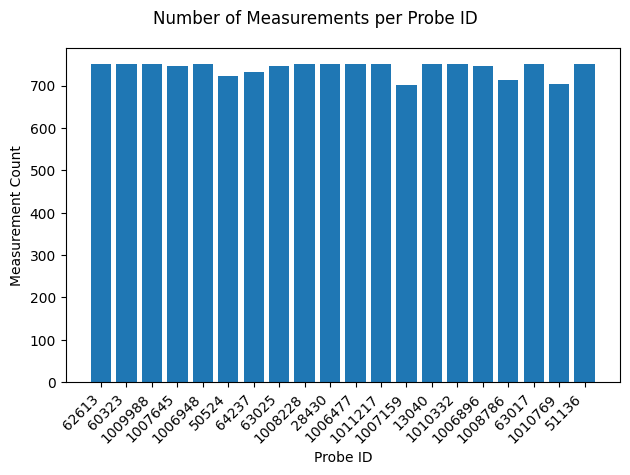

In [8]:
probe_ids = list(measurements_by_probe_id.keys())
measurement_counts = [len(measurements_by_probe_id[probe_id]) for probe_id in probe_ids]
fig, ax = plt.subplots()
ax.bar(probe_ids, measurement_counts)
ax.set_xlabel('Probe ID')
ax.set_ylabel('Measurement Count')
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
fig.suptitle('Number of Measurements per Probe ID')
fig.tight_layout()

# Successful vs Unsuccessful Measurements

## Total

Total measurements: 14821
Successful measurements: 14419 (97.29%)
Unsuccessful measurements: 402 (2.71%)


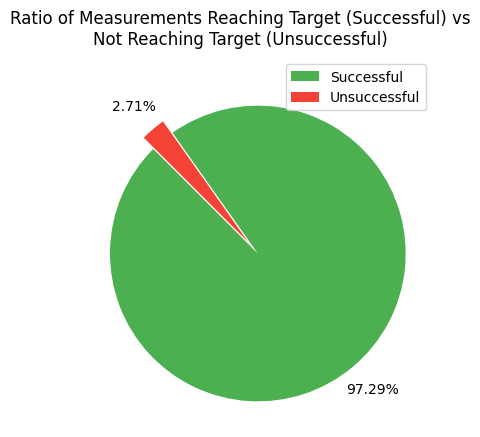

In [9]:
total_measurements = len(measurements)
print(f"Total measurements: {total_measurements}")
successful_measurements = [m for m in measurements if m.reached_target]
successful_count = len(successful_measurements)
print(f"Successful measurements: {successful_count} ({successful_count / total_measurements * 100:.2f}%)")
unsuccessful_measurements = [m for m in measurements if not m.reached_target]
unsuccessful_count = len(unsuccessful_measurements)
print(f"Unsuccessful measurements: {unsuccessful_count} ({unsuccessful_count / total_measurements * 100:.2f}%)")

labels = ['Successful', 'Unsuccessful']
sizes = [successful_count, unsuccessful_count]
colors = ['#4CAF50', '#F44336']
explode = (0.1, 0)
fig, ax1 = plt.subplots()
_ = ax1.pie(sizes, explode=explode, colors=colors, autopct='%.2f%%', startangle=135, pctdistance=1.2)
_ = ax1.legend(labels, loc="upper right")
_ = fig.suptitle('Ratio of Measurements Reaching Target (Successful) vs\nNot Reaching Target (Unsuccessful)')

## By Probe ID

In [10]:
for probe_id, probe_measurements in measurements_by_probe_id.items():
    successful_count = sum(1 for m in probe_measurements if m.reached_target)
    unsuccessful_count = len(probe_measurements) - successful_count
    print(f"Probe ID: {probe_id},\tSuccessful: {successful_count},\tUnsuccessful: {unsuccessful_count}")

Probe ID: 62613,	Successful: 740,	Unsuccessful: 10
Probe ID: 60323,	Successful: 741,	Unsuccessful: 10
Probe ID: 1009988,	Successful: 744,	Unsuccessful: 7
Probe ID: 1007645,	Successful: 742,	Unsuccessful: 3
Probe ID: 1006948,	Successful: 718,	Unsuccessful: 33
Probe ID: 50524,	Successful: 708,	Unsuccessful: 14
Probe ID: 64237,	Successful: 610,	Unsuccessful: 122
Probe ID: 63025,	Successful: 736,	Unsuccessful: 10
Probe ID: 1008228,	Successful: 742,	Unsuccessful: 9
Probe ID: 28430,	Successful: 663,	Unsuccessful: 88
Probe ID: 1006477,	Successful: 733,	Unsuccessful: 18
Probe ID: 1011217,	Successful: 750,	Unsuccessful: 1
Probe ID: 1007159,	Successful: 691,	Unsuccessful: 11
Probe ID: 13040,	Successful: 740,	Unsuccessful: 11
Probe ID: 1010332,	Successful: 741,	Unsuccessful: 10
Probe ID: 1006896,	Successful: 735,	Unsuccessful: 12
Probe ID: 1008786,	Successful: 711,	Unsuccessful: 2
Probe ID: 63017,	Successful: 740,	Unsuccessful: 11
Probe ID: 1010769,	Successful: 694,	Unsuccessful: 9
Probe ID: 5113

## By Probe ID

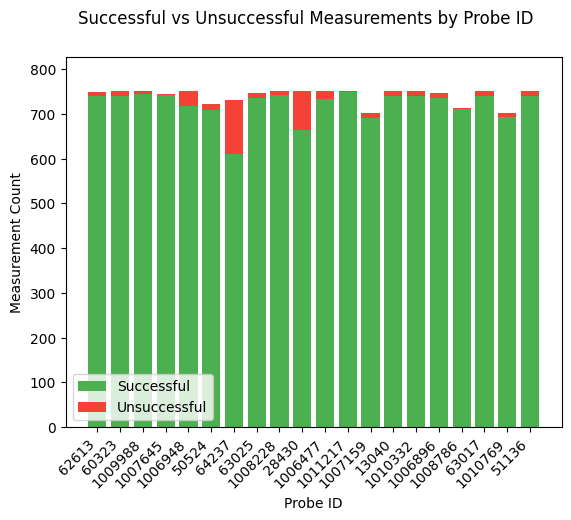

In [11]:
fig, ax1 = plt.subplots()
successful = [sum(1 for m in measurements_by_probe_id[probe_id] if m.reached_target) for probe_id in probe_ids]
unsuccessful = [sum(1 for m in measurements_by_probe_id[probe_id] if not m.reached_target) for probe_id in probe_ids]
ax1.bar(probe_ids, successful, label='Successful', color='#4CAF50')
ax1.bar(probe_ids, unsuccessful, label='Unsuccessful', color='#F44336', bottom=successful)
ax1.set_xlabel('Probe ID')
ax1.set_ylabel('Measurement Count')
ax1.set_ylim(0, max([s + u for s, u in zip(successful, unsuccessful)]) * 1.1)
for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
fig.suptitle('Successful vs Unsuccessful Measurements by Probe ID')
_ = ax1.legend()

# Gateway Visibility

## Total

Measurements where gateway IP (100.64.0.1) is present:	12902
Measurements where gateway IP (100.64.0.1) is absent:	1919
Figure size: 6.4 x 4.8 inches


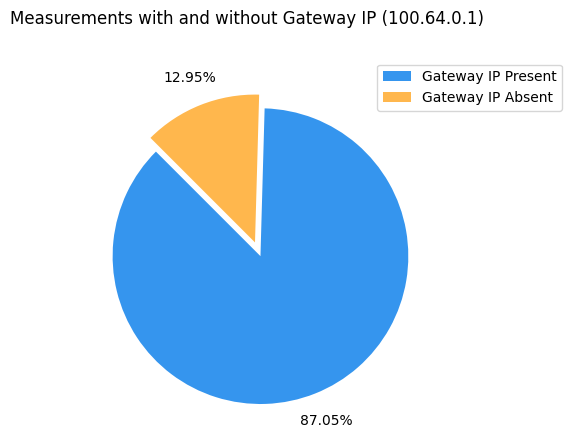

In [12]:
gateway_present, gateway_absent = parse.get_probe_measurements_with_and_without_ip(measurements, gateway_ip)
print(f"Measurements where gateway IP ({gateway_ip}) is present:\t{len(gateway_present)}")
print(f"Measurements where gateway IP ({gateway_ip}) is absent:\t{len(gateway_absent)}")

fig, ax1 = plt.subplots()
labels = ['Gateway IP Present', 'Gateway IP Absent']
sizes = [len(gateway_present), len(gateway_absent)]
colors = ["#3595EE", "#FFB74D"]
explode = (0.1, 0)
_ = ax1.pie(sizes, explode=explode, colors=colors, autopct='%.2f%%', startangle=135, pctdistance=1.2)
_ = ax1.legend(labels, loc="upper right", bbox_to_anchor=(1.35, 1))
_ = fig.suptitle('Measurements with and without Gateway IP (' + gateway_ip + ')')

# get fig size in the same units passed to the `subplots` function
fig_size = fig.get_size_inches()
print(f"Figure size: {fig_size[0]} x {fig_size[1]} inches")


## Total (with Success or Failure)

Successful measurements where gateway IP (100.64.0.1) is present: 12877
Successful measurements where gateway IP (100.64.0.1) is absent: 1542
Unsuccessful measurements where gateway IP (100.64.0.1) is present: 25
Unsuccessful measurements where gateway IP (100.64.0.1) is absent: 377


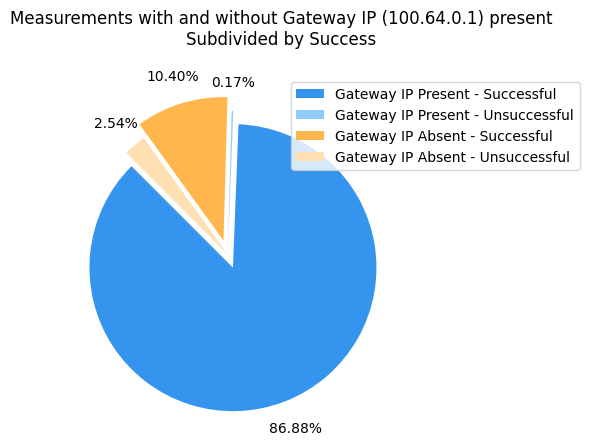

In [13]:
gateway_present_successful = [m for m in gateway_present if m.reached_target]
gateway_present_unsuccessful = [m for m in gateway_present if not m.reached_target]
gateway_absent_successful = [m for m in gateway_absent if m.reached_target]
gateway_absent_unsuccessful = [m for m in gateway_absent if not m.reached_target]
print(f"Successful measurements where gateway IP ({gateway_ip}) is present: {len(gateway_present_successful)}")
print(f"Successful measurements where gateway IP ({gateway_ip}) is absent: {len(gateway_absent_successful)}")
print(f"Unsuccessful measurements where gateway IP ({gateway_ip}) is present: {len(gateway_present_unsuccessful)}")
print(f"Unsuccessful measurements where gateway IP ({gateway_ip}) is absent: {len(gateway_absent_unsuccessful)}")
fig, ax1 = plt.subplots(figsize=(6, 4.5))
labels = ['Gateway IP Present - Successful', 'Gateway IP Present - Unsuccessful',
          'Gateway IP Absent - Successful', 'Gateway IP Absent - Unsuccessful']
sizes = [len(gateway_present_successful), len(gateway_present_unsuccessful),
         len(gateway_absent_successful), len(gateway_absent_unsuccessful)]
colors = ["#3595EE", "#90CAF9", "#FFB74D", "#FFE0B2"]
explode = (0.1, 0, 0.1, 0)
_ = ax1.pie(sizes, explode=explode, colors=colors, autopct='%.2f%%', startangle=135, pctdistance=1.2)
_ = ax1.legend(labels, loc="upper right", bbox_to_anchor=(1.5, 1))
_ = fig.suptitle('Measurements with and without Gateway IP (' + gateway_ip + ') present\nSubdivided by Success')
_ = fig.tight_layout()

## By Probe ID
We continue with only the successful measurements

In [14]:
successful_measurements = []
for probe_id, probe_measurements in measurements_by_probe_id.items():
    successful_measurements.extend([m for m in probe_measurements if m.reached_target])

successful_measurements_by_probe_id = {}
for measurement in successful_measurements:
    if measurement.id not in successful_measurements_by_probe_id:
        successful_measurements_by_probe_id[measurement.id] = []
    successful_measurements_by_probe_id[measurement.id].append(measurement)

In [15]:
successful_measurements_gateway_presence_per_probe_id = {probe_id: {"present": [], "absent": []} for probe_id in measurements_by_probe_id.keys()}
for probe_id, probe_measurements in successful_measurements_by_probe_id.items():
    present, absent = parse.get_probe_measurements_with_and_without_ip(probe_measurements, gateway_ip)
    successful_measurements_gateway_presence_per_probe_id[probe_id]["present"].extend(present)
    successful_measurements_gateway_presence_per_probe_id[probe_id]["absent"].extend(absent)

In [16]:
print(f"Successful measurements with gateway IP ({gateway_ip}) presence by probe ID:")
for probe_id in probe_ids:
    present_count = len(successful_measurements_gateway_presence_per_probe_id[probe_id]["present"])
    absent_count = len(successful_measurements_gateway_presence_per_probe_id[probe_id]["absent"])
    print(f"{'Probe ID:':<10} {probe_id:<10} {'Gateway IP Present:':<20} {present_count:<5} {'Gateway IP Absent:':<20} {absent_count:<5}")

Successful measurements with gateway IP (100.64.0.1) presence by probe ID:
Probe ID:  62613      Gateway IP Present:  738   Gateway IP Absent:   2    
Probe ID:  60323      Gateway IP Present:  738   Gateway IP Absent:   3    
Probe ID:  1009988    Gateway IP Present:  731   Gateway IP Absent:   13   
Probe ID:  1007645    Gateway IP Present:  725   Gateway IP Absent:   17   
Probe ID:  1006948    Gateway IP Present:  0     Gateway IP Absent:   718  
Probe ID:  50524      Gateway IP Present:  706   Gateway IP Absent:   2    
Probe ID:  64237      Gateway IP Present:  609   Gateway IP Absent:   1    
Probe ID:  63025      Gateway IP Present:  734   Gateway IP Absent:   2    
Probe ID:  1008228    Gateway IP Present:  742   Gateway IP Absent:   0    
Probe ID:  28430      Gateway IP Present:  642   Gateway IP Absent:   21   
Probe ID:  1006477    Gateway IP Present:  0     Gateway IP Absent:   733  
Probe ID:  1011217    Gateway IP Present:  738   Gateway IP Absent:   12   
Probe ID:  10

## By Probe ID
Again, only successful measurements

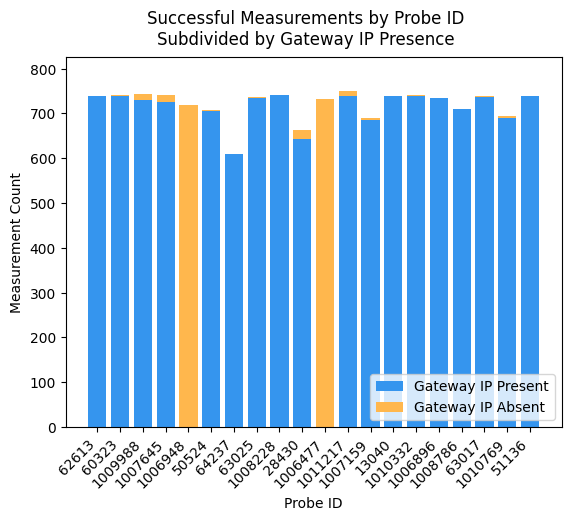

In [17]:

fig, ax1 = plt.subplots()
successful_present = [len(successful_measurements_gateway_presence_per_probe_id[probe_id]["present"]) for probe_id in probe_ids]
successful_absent = [len(successful_measurements_gateway_presence_per_probe_id[probe_id]["absent"]) for probe_id in probe_ids]
ax1.bar(probe_ids, successful_present, label='Gateway IP Present', color='#3595EE')
ax1.bar(probe_ids, successful_absent, label='Gateway IP Absent', color='#FFB74D', bottom=successful_present)
ax1.set_xlabel('Probe ID')
ax1.set_ylabel('Measurement Count')
ax1.set_ylim(0, max([s + u for s, u in zip(successful_present, successful_absent)]) * 1.1)
for label in ax1.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
fig.suptitle('Successful Measurements by Probe ID\nSubdivided by Gateway IP Presence')
_ = ax1.legend(loc="lower right")

# Bent Pipe Latency
For the probes that don't have the gateway IP 100.64.0.1 present in the trace, we assume the first visible IP is the gateway IP.

## RTT Distribution per Probe ID

In [18]:
data = []
labels = []
for probe_id in probe_ids:
    probe_latencies = []
    probe_measurements = successful_measurements_gateway_presence_per_probe_id[probe_id]["present"]
    for measurement in probe_measurements:
        for hop in measurement.hops:
            if hop.ip == gateway_ip and hop.rtt_times_ms:
                mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                probe_latencies.append(mean_rtt)

    if probe_latencies:
        data.append(probe_latencies)
        labels.append(str(probe_id))

        q1, q2, q3 = statistics.quantiles(probe_latencies, n=4)
        interquartile_range = q3 - q1
        lower_bound = q1 - 1.5 * interquartile_range
        upper_bound = q3 + 1.5 * interquartile_range

        outliers = [x for x in probe_latencies if x < lower_bound or x > upper_bound]
        inliers = [x for x in probe_latencies if lower_bound <= x <= upper_bound]

        print(f"Probe ID: {probe_id}")
        print(f"  Number of outliers: {len(outliers)}")
        print(f"  Number of inliers: {len(inliers)}")

Probe ID: 62613
  Number of outliers: 30
  Number of inliers: 708
Probe ID: 60323
  Number of outliers: 34
  Number of inliers: 704
Probe ID: 1009988
  Number of outliers: 49
  Number of inliers: 682
Probe ID: 1007645
  Number of outliers: 46
  Number of inliers: 679
Probe ID: 50524
  Number of outliers: 30
  Number of inliers: 676
Probe ID: 64237
  Number of outliers: 4
  Number of inliers: 605
Probe ID: 63025
  Number of outliers: 30
  Number of inliers: 704
Probe ID: 1008228
  Number of outliers: 12
  Number of inliers: 730
Probe ID: 28430
  Number of outliers: 39
  Number of inliers: 603
Probe ID: 1011217
  Number of outliers: 62
  Number of inliers: 676
Probe ID: 1007159
  Number of outliers: 13
  Number of inliers: 673
Probe ID: 13040
  Number of outliers: 44
  Number of inliers: 696
Probe ID: 1010332
  Number of outliers: 43
  Number of inliers: 697
Probe ID: 1006896
  Number of outliers: 25
  Number of inliers: 709
Probe ID: 1008786
  Number of outliers: 34
  Number of inliers:

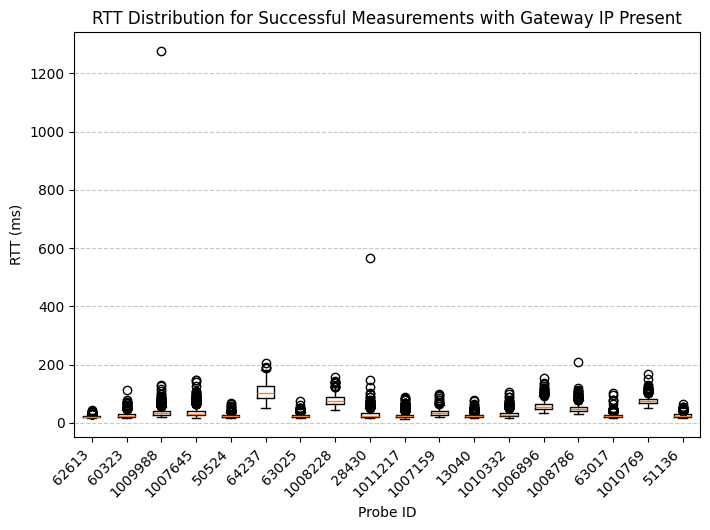

In [19]:

fig, ax = plt.subplots(figsize=(7.2, 5.4))
ax.boxplot(data, tick_labels=labels)
ax.set_xlabel('Probe ID')
ax.set_ylabel('RTT (ms)')
ax.set_title('RTT Distribution for Successful Measurements with Gateway IP Present')
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()

## Median RTT over Time per Probe ID

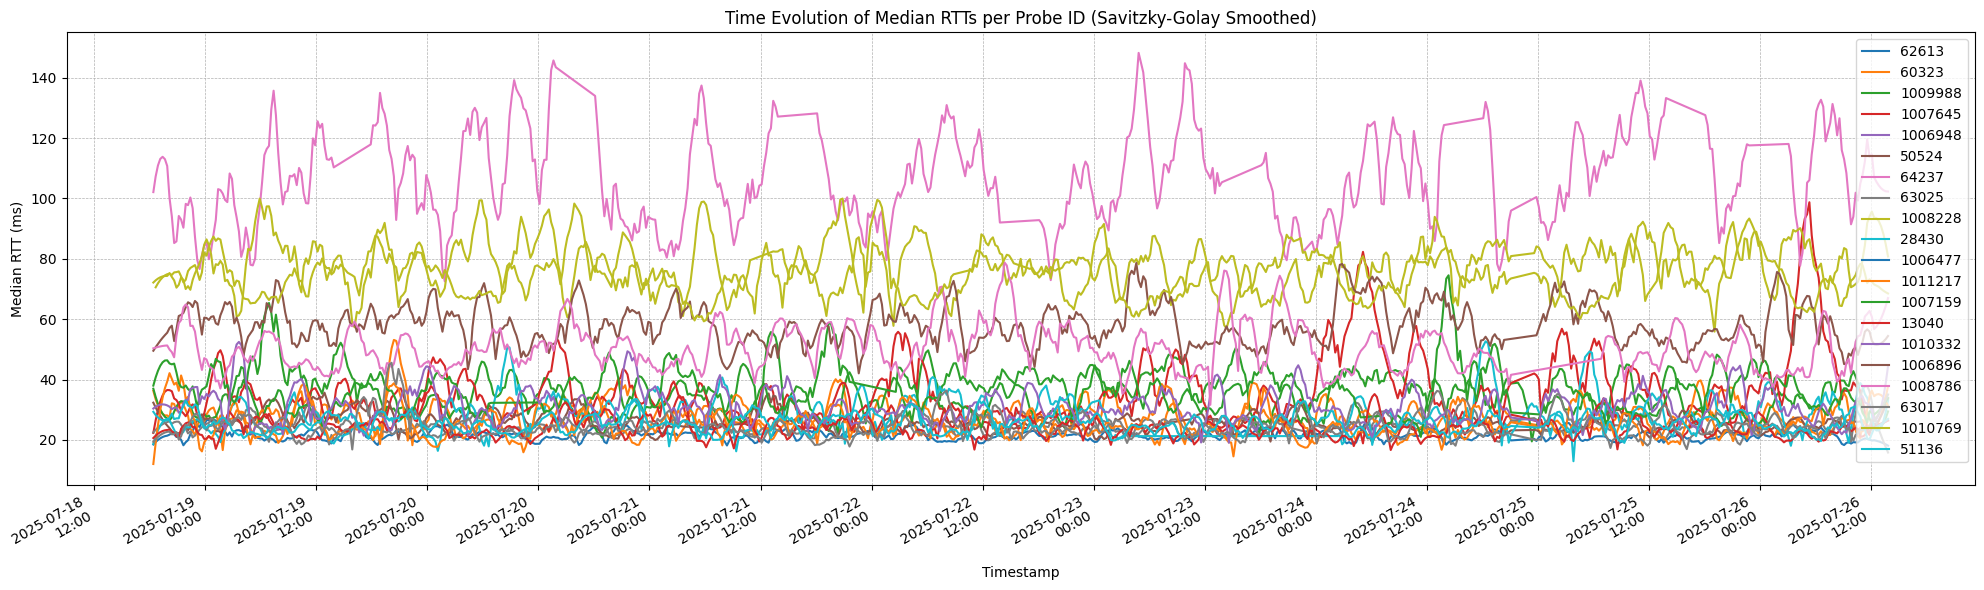

In [20]:
probe_time_series = {probe_id: [] for probe_id in probe_ids}
probe_time_stamps = {probe_id: [] for probe_id in probe_ids}
for probe_id in probe_ids:
    probe_measurements = successful_measurements_gateway_presence_per_probe_id[probe_id]["present"]
    for measurement in sorted(probe_measurements, key=lambda m: m.timestamp):
        for hop in measurement.hops:
            if hop.ip == gateway_ip and hop.rtt_times_ms:
                median_rtt = statistics.median(hop.rtt_times_ms)
                probe_time_series[probe_id].append(median_rtt)
                probe_time_stamps[probe_id].append(datetime.datetime.fromtimestamp(measurement.timestamp))
fig, ax = plt.subplots(figsize=(20, 6))
for probe_id in probe_ids:
    y = probe_time_series[probe_id]
    x = probe_time_stamps[probe_id]
    if len(y) >= 5:
        y_smooth = savgol_filter(y, window_length=13, polyorder=2)
        ax.plot(x, y_smooth, label=str(probe_id))
    else:
        ax.plot(x, y, label=str(probe_id))
ax.set_xlabel("Timestamp")
ax.set_ylabel("Median RTT (ms)")
ax.set_title("Time Evolution of Median RTTs per Probe ID (Savitzky-Golay Smoothed)")
ax.legend()
ax.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
fig.autofmt_xdate()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
fig.tight_layout()

### Top three highest median RTTs are:
* **Lime**: Marshall Islands (Oceania)
* **Brown**: Kiribati (Oceania)
* **Cyan**: Yemen (Asia)

**Assumption**: There are no ground stations in these countries, so the RTT includes more intersatellite links.

## RTT Distribution per Continent per Probe ID

In [21]:
continents = {
    "Africa": {},
    "Asia": {},
    "Europe": {},
    "North America": {},
    "Oceania": {},
    "South America": {}
}

for continent in continents:
    continents[continent] = {"probe_ids": []}

continents["North America"]["probe_ids"].extend(["1011217", "1007159", "62613", "63017", "63025", "1006896", "1006948", ])
continents["South America"]["probe_ids"].extend(["1007645"])
continents["Europe"]["probe_ids"].extend(["1010332", "13040", "28430", "51136", "60323", ])
continents["Oceania"]["probe_ids"].extend(["64237", "1008228"])
continents["Africa"]["probe_ids"].extend(["1008786"])
continents["Asia"]["probe_ids"].extend(["50524", "1010769", "1009988", "1006477"])

### Africa

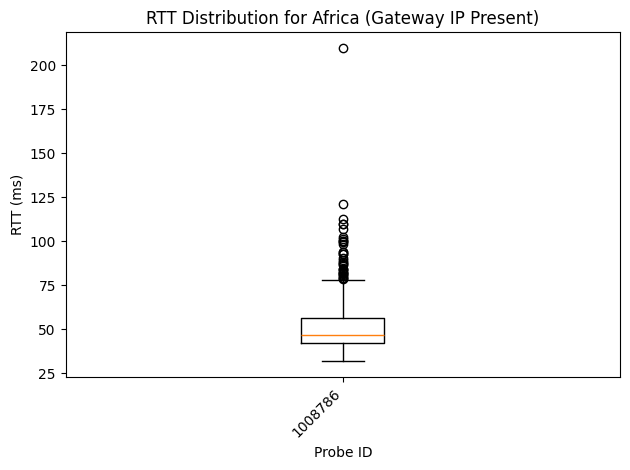

In [22]:
for continent, info in continents.items():
    if continent != "Africa":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots()
        ax1.boxplot(data, tick_labels=labels)
        ax1.set_xlabel('Probe ID')
        ax1.set_ylabel('RTT (ms)')
        ax1.set_title(f'RTT Distribution for {continent} (Gateway IP Present)')
        for label in ax1.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
        fig.tight_layout()

### Africa

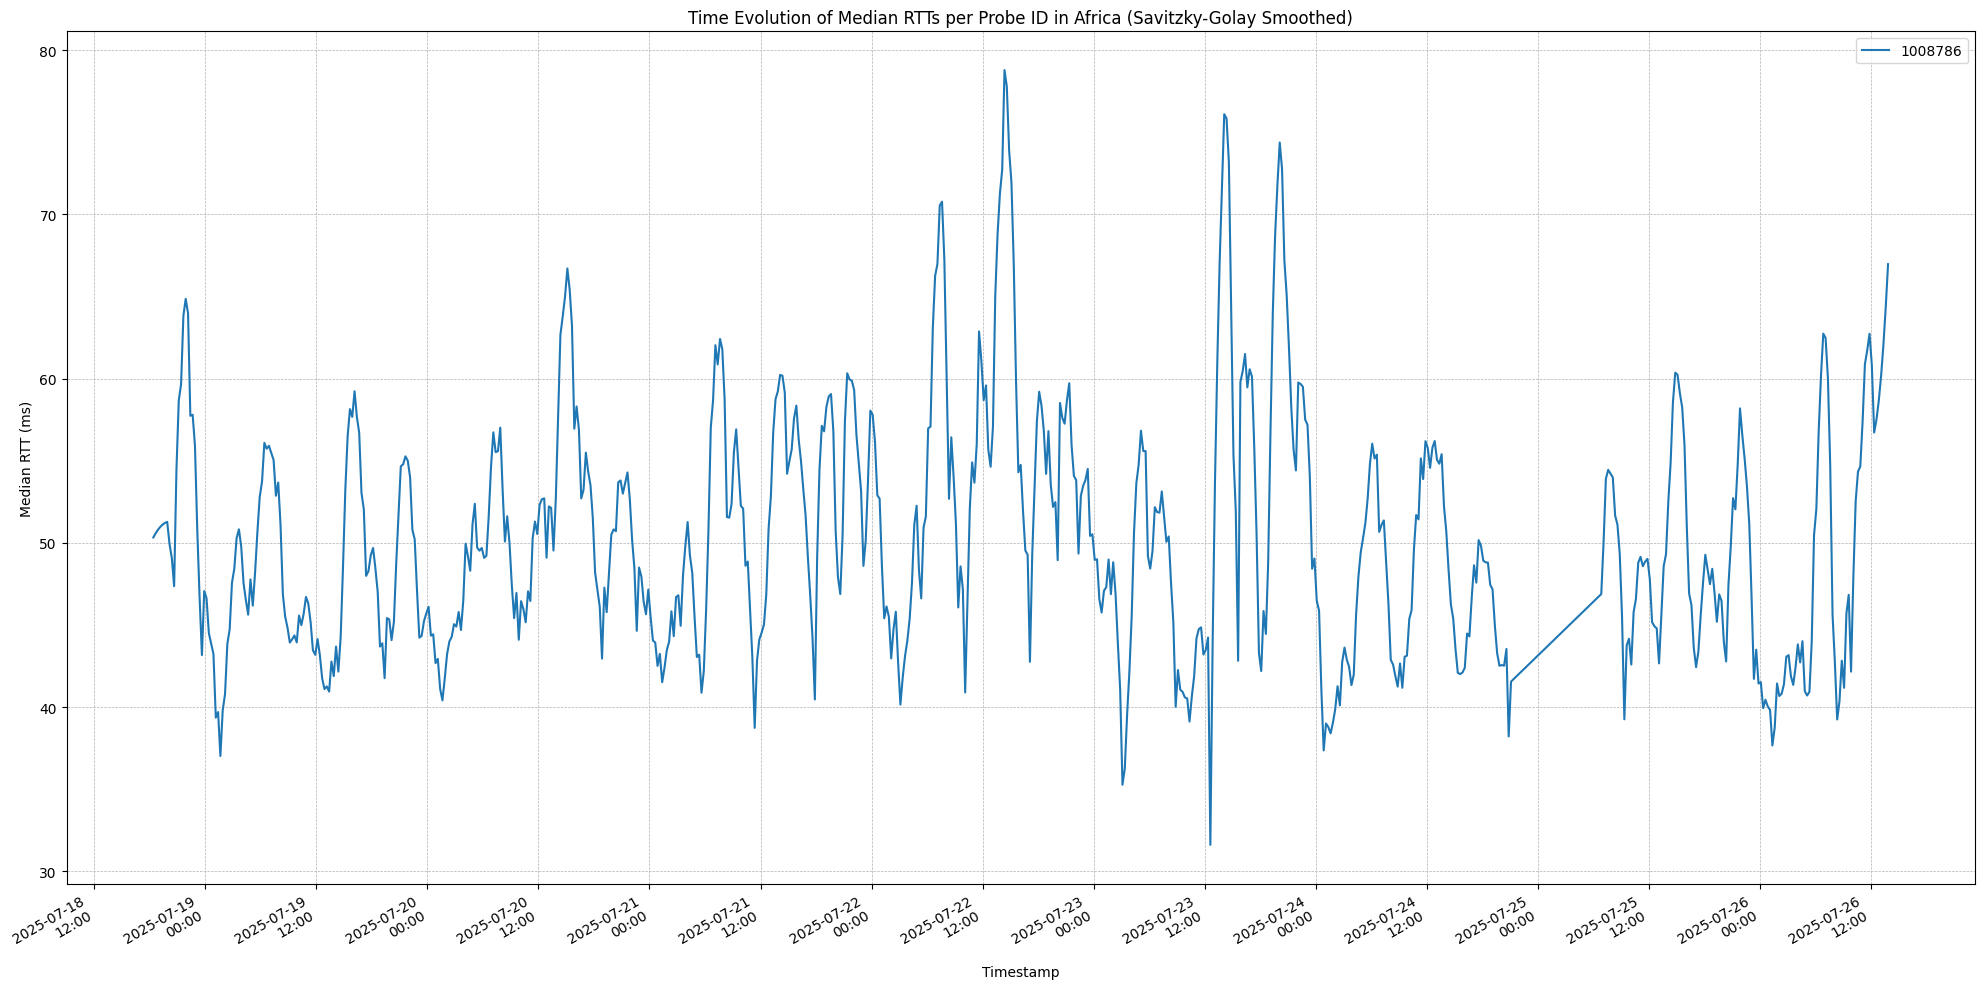

In [23]:
for continent, info in continents.items():
    if continent != "Africa":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        for probe_id in info["probe_ids"]:
            y = probe_time_series[probe_id]
            x = probe_time_stamps[probe_id]
            if len(y) >= 5:
                y_smooth = savgol_filter(y, window_length=13, polyorder=2)
                ax1.plot(x, y_smooth, label=str(probe_id))
            else:
                ax1.plot(x, y, label=str(probe_id))
        ax1.set_xlabel("Timestamp")
        ax1.set_ylabel("Median RTT (ms)")
        ax1.set_title(f"Time Evolution of Median RTTs per Probe ID in {continent} (Savitzky-Golay Smoothed)")
        ax1.legend()
        ax1.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
        ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
        fig.autofmt_xdate()
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        fig.tight_layout()

### Asia

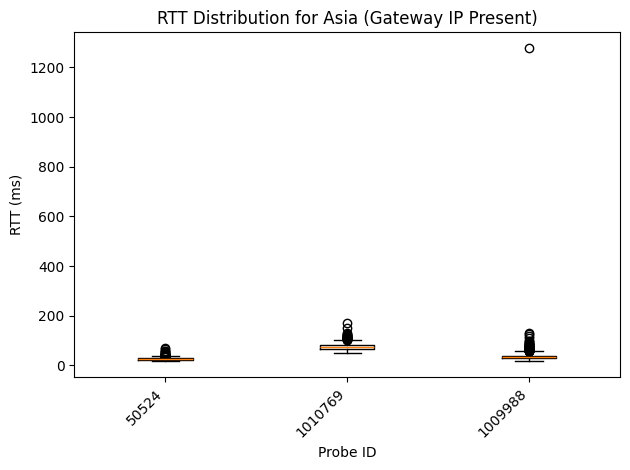

In [24]:
for continent, info in continents.items():
    if continent != "Asia":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots()
        ax1.boxplot(data, tick_labels=labels)
        ax1.set_xlabel('Probe ID')
        ax1.set_ylabel('RTT (ms)')
        ax1.set_title(f'RTT Distribution for {continent} (Gateway IP Present)')
        for label in ax1.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
        fig.tight_layout()

### Asia

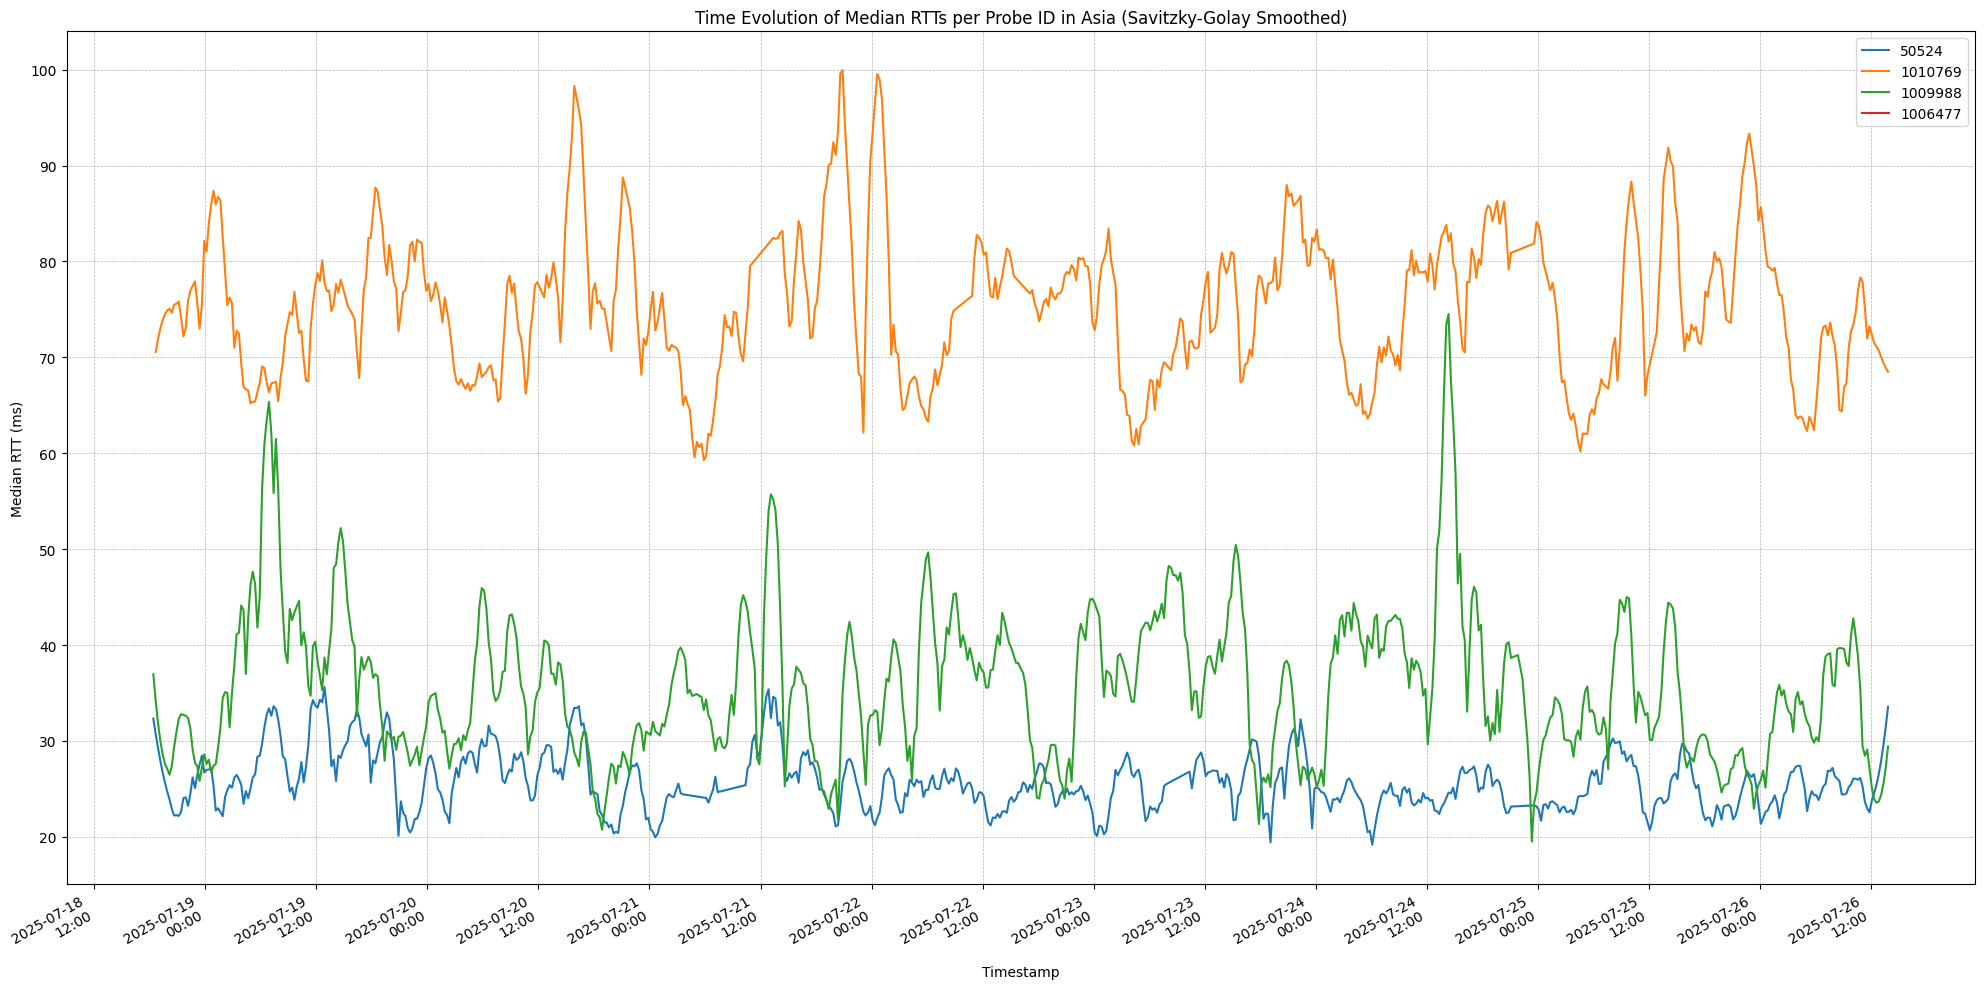

In [25]:
for continent, info in continents.items():
    if continent != "Asia":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        for probe_id in info["probe_ids"]:
            y = probe_time_series[probe_id]
            x = probe_time_stamps[probe_id]
            if len(y) >= 5:
                y_smooth = savgol_filter(y, window_length=13, polyorder=2)
                ax1.plot(x, y_smooth, label=str(probe_id))
            else:
                ax1.plot(x, y, label=str(probe_id))
        ax1.set_xlabel("Timestamp")
        ax1.set_ylabel("Median RTT (ms)")
        ax1.set_title(f"Time Evolution of Median RTTs per Probe ID in {continent} (Savitzky-Golay Smoothed)")
        ax1.legend()
        ax1.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
        ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
        fig.autofmt_xdate()
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        fig.tight_layout()

### Europe

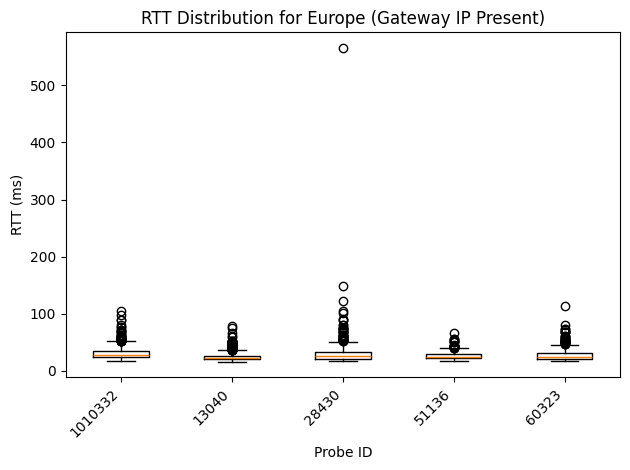

In [26]:
for continent, info in continents.items():
    if continent != "Europe":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots()
        ax1.boxplot(data, tick_labels=labels)
        ax1.set_xlabel('Probe ID')
        ax1.set_ylabel('RTT (ms)')
        ax1.set_title(f'RTT Distribution for {continent} (Gateway IP Present)')
        for label in ax1.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
        fig.tight_layout()

### Europe

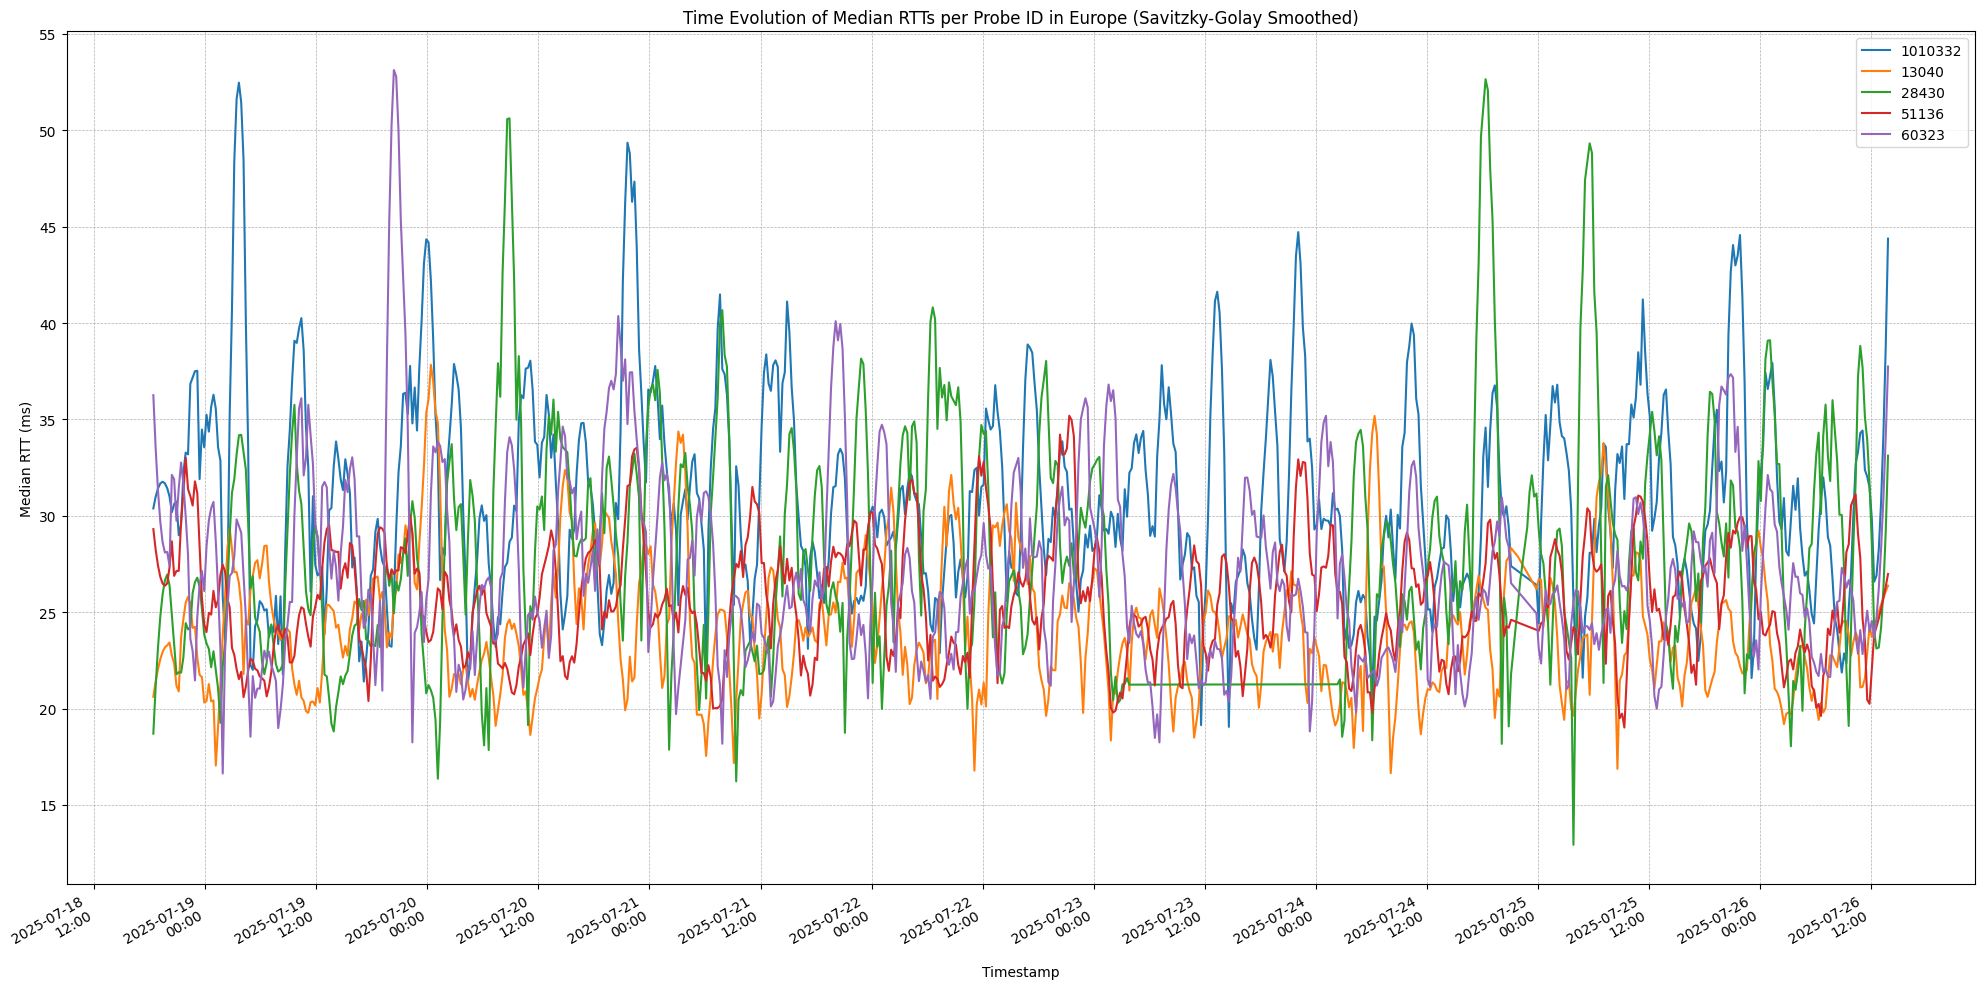

In [27]:
for continent, info in continents.items():
    if continent != "Europe":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        for probe_id in info["probe_ids"]:
            y = probe_time_series[probe_id]
            x = probe_time_stamps[probe_id]
            if len(y) >= 5:
                y_smooth = savgol_filter(y, window_length=13, polyorder=2)
                ax1.plot(x, y_smooth, label=str(probe_id))
            else:
                ax1.plot(x, y, label=str(probe_id))
        ax1.set_xlabel("Timestamp")
        ax1.set_ylabel("Median RTT (ms)")
        ax1.set_title(f"Time Evolution of Median RTTs per Probe ID in {continent} (Savitzky-Golay Smoothed)")
        ax1.legend()
        ax1.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
        ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
        fig.autofmt_xdate()
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        fig.tight_layout()

### Oceania

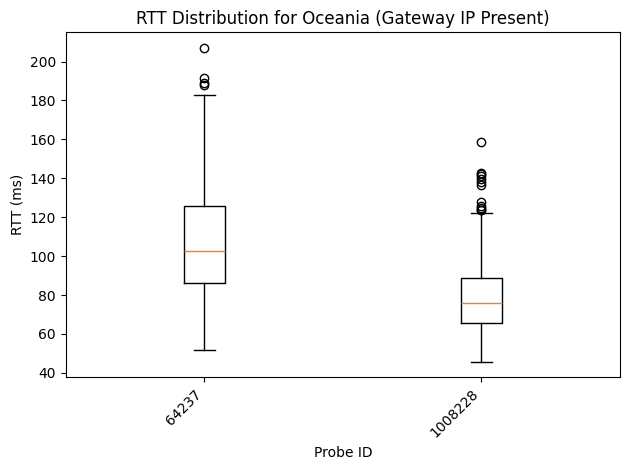

In [28]:
for continent, info in continents.items():
    if continent != "Oceania":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots()
        ax1.boxplot(data, tick_labels=labels)
        ax1.set_xlabel('Probe ID')
        ax1.set_ylabel('RTT (ms)')
        ax1.set_title(f'RTT Distribution for {continent} (Gateway IP Present)')
        for label in ax1.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
        fig.tight_layout()

### Oceania

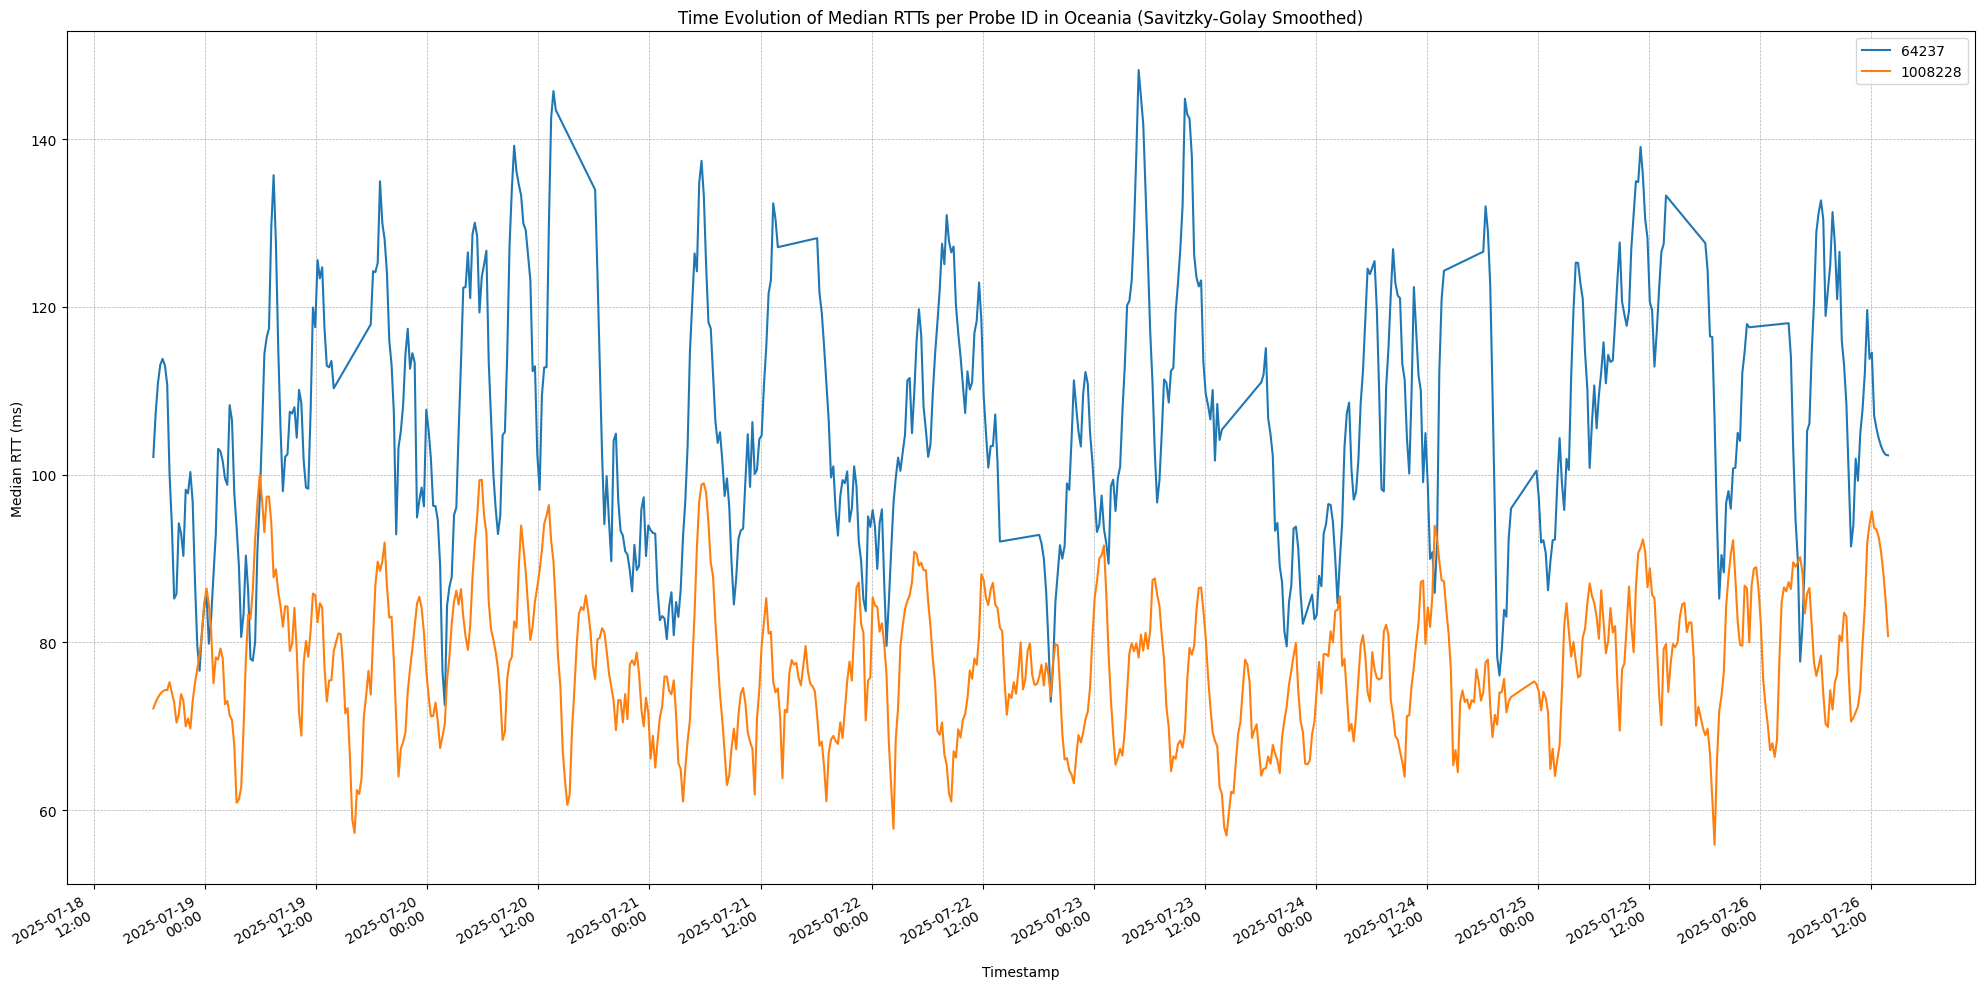

In [29]:
for continent, info in continents.items():
    if continent != "Oceania":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        for probe_id in info["probe_ids"]:
            y = probe_time_series[probe_id]
            x = probe_time_stamps[probe_id]
            if len(y) >= 5:
                y_smooth = savgol_filter(y, window_length=13, polyorder=2)
                ax1.plot(x, y_smooth, label=str(probe_id))
            else:
                ax1.plot(x, y, label=str(probe_id))
        ax1.set_xlabel("Timestamp")
        ax1.set_ylabel("Median RTT (ms)")
        ax1.set_title(f"Time Evolution of Median RTTs per Probe ID in {continent} (Savitzky-Golay Smoothed)")
        ax1.legend()
        ax1.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
        ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
        fig.autofmt_xdate()
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        fig.tight_layout()

### North America

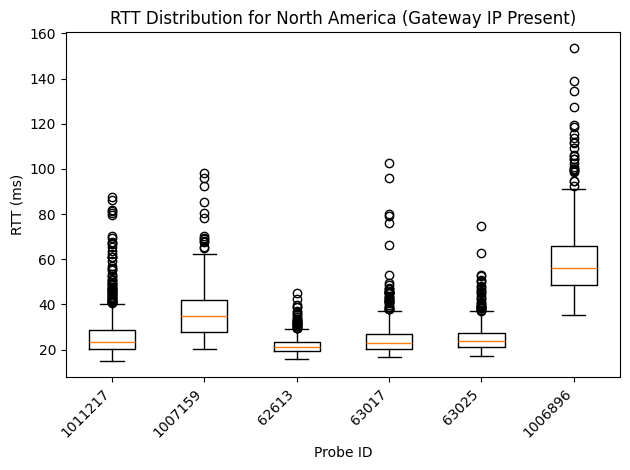

In [30]:
for continent, info in continents.items():
    if continent != "North America":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots()
        ax1.boxplot(data, tick_labels=labels)
        ax1.set_xlabel('Probe ID')
        ax1.set_ylabel('RTT (ms)')
        ax1.set_title(f'RTT Distribution for {continent} (Gateway IP Present)')
        for label in ax1.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
        fig.tight_layout()

### North America

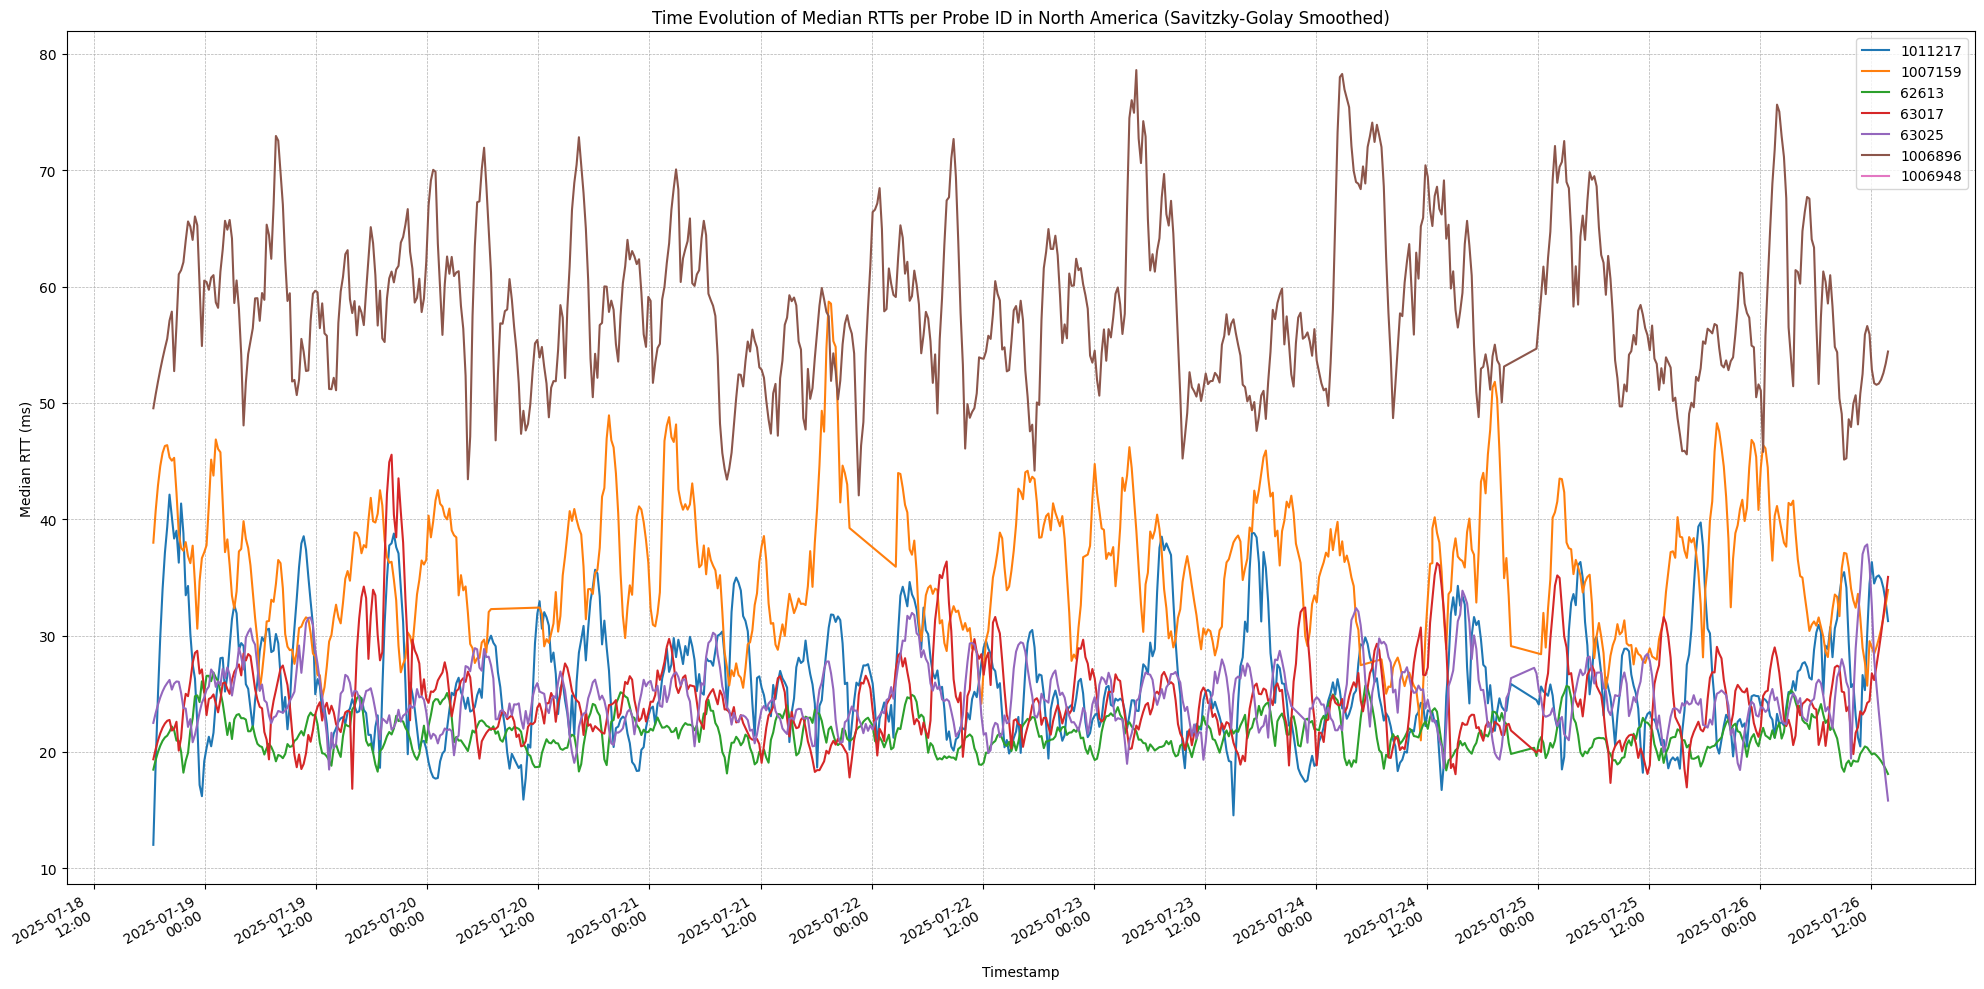

In [31]:
for continent, info in continents.items():
    if continent != "North America":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        for probe_id in info["probe_ids"]:
            y = probe_time_series[probe_id]
            x = probe_time_stamps[probe_id]
            if len(y) >= 5:
                y_smooth = savgol_filter(y, window_length=13, polyorder=2)
                ax1.plot(x, y_smooth, label=str(probe_id))
            else:
                ax1.plot(x, y, label=str(probe_id))
        ax1.set_xlabel("Timestamp")
        ax1.set_ylabel("Median RTT (ms)")
        ax1.set_title(f"Time Evolution of Median RTTs per Probe ID in {continent} (Savitzky-Golay Smoothed)")
        ax1.legend()
        ax1.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
        ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
        fig.autofmt_xdate()
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        fig.tight_layout()

### South America

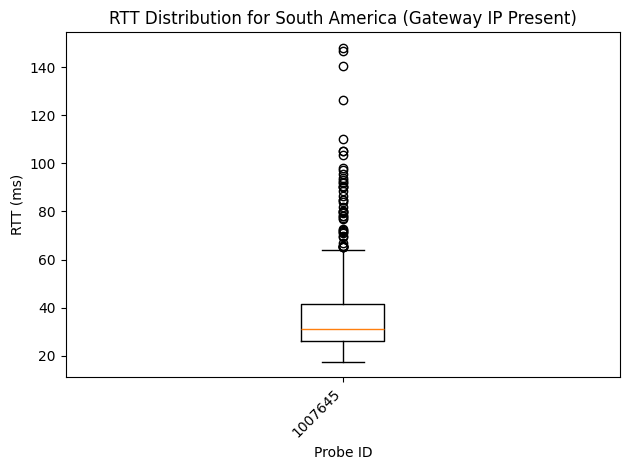

In [32]:
for continent, info in continents.items():
    if continent != "South America":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots()
        ax1.boxplot(data, tick_labels=labels)
        ax1.set_xlabel('Probe ID')
        ax1.set_ylabel('RTT (ms)')
        ax1.set_title(f'RTT Distribution for {continent} (Gateway IP Present)')
        for label in ax1.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
        fig.tight_layout()

### South America

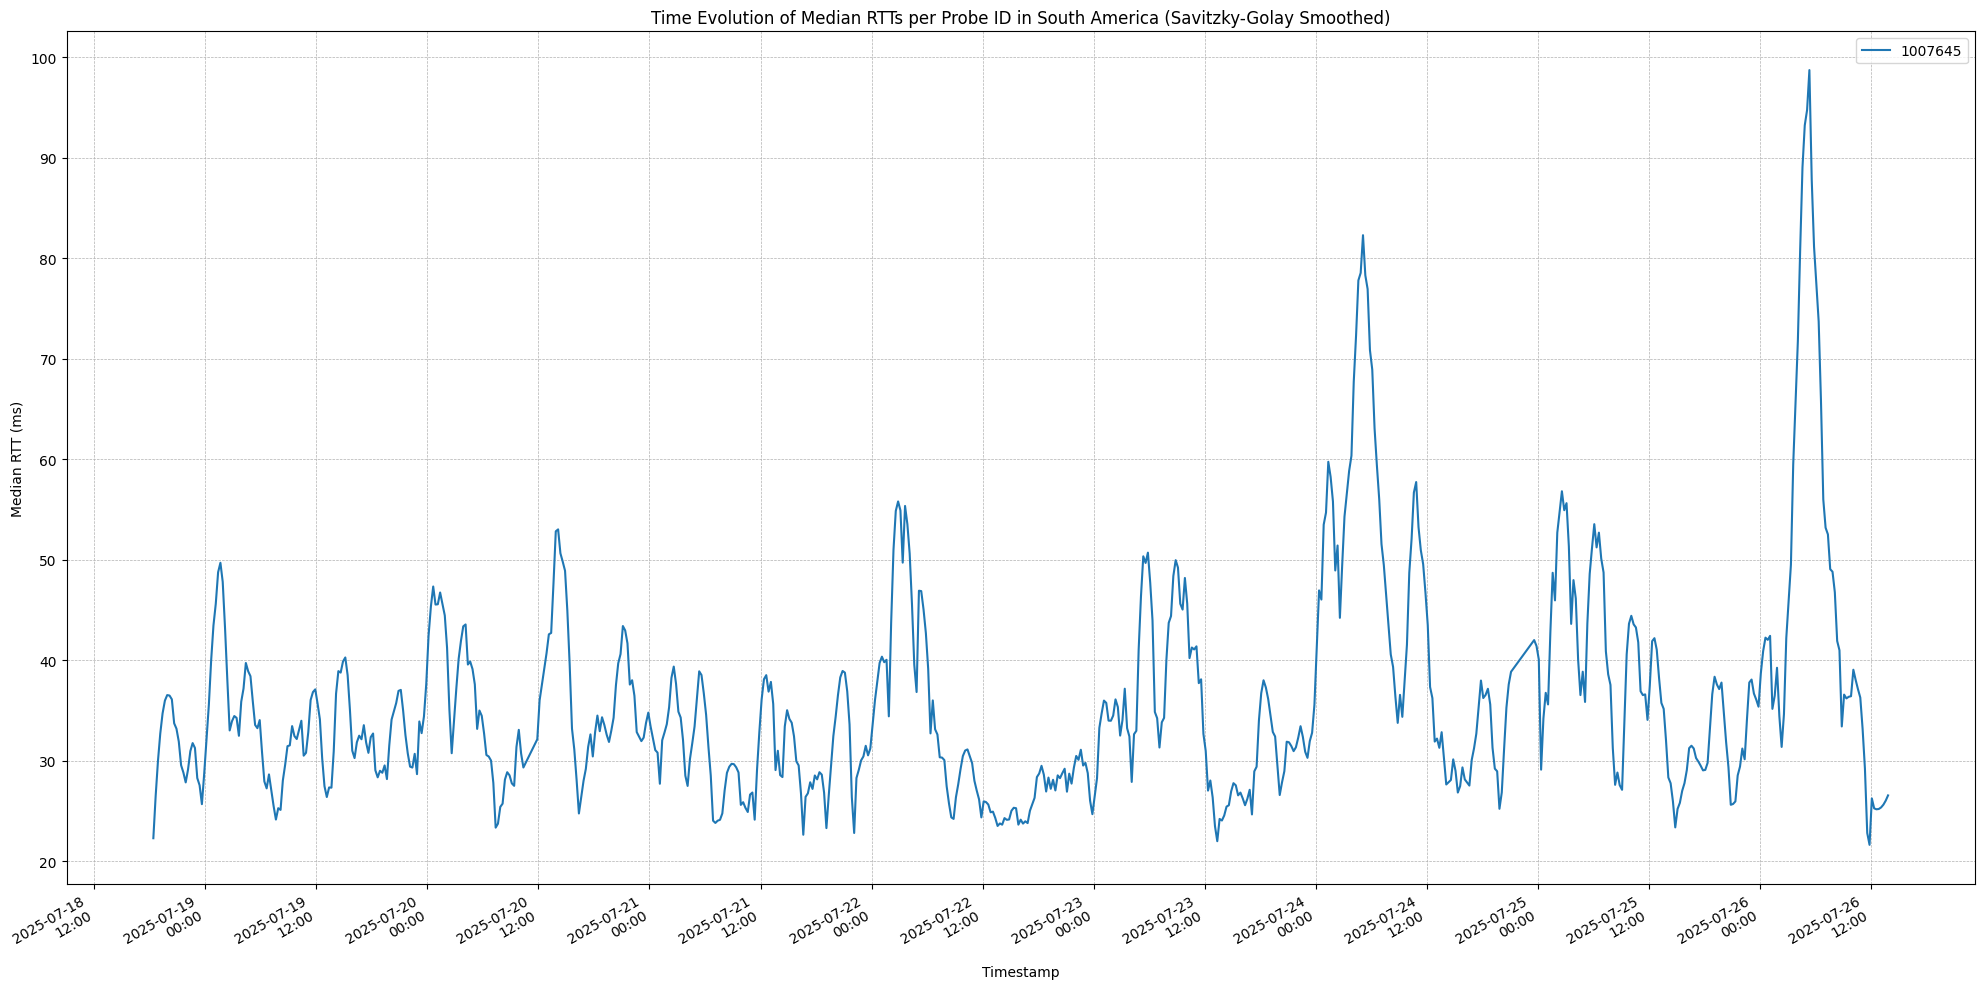

In [33]:
for continent, info in continents.items():
    if continent != "South America":
        continue
    data = []
    labels = []
    for probe_id in info["probe_ids"]:
        probe_latencies = []
        probe_measurements = successful_measurements_gateway_presence_per_probe_id.get(probe_id, {}).get("present", [])
        for measurement in probe_measurements:
            for hop in measurement.hops:
                if hop.ip == gateway_ip and hop.rtt_times_ms:
                    mean_rtt = sum(hop.rtt_times_ms) / len(hop.rtt_times_ms)
                    probe_latencies.append(mean_rtt)
        if probe_latencies:
            data.append(probe_latencies)
            labels.append(str(probe_id))
    if data:
        fig, ax1 = plt.subplots(figsize=(20, 10))
        for probe_id in info["probe_ids"]:
            y = probe_time_series[probe_id]
            x = probe_time_stamps[probe_id]
            if len(y) >= 5:
                y_smooth = savgol_filter(y, window_length=13, polyorder=2)
                ax1.plot(x, y_smooth, label=str(probe_id))
            else:
                ax1.plot(x, y, label=str(probe_id))
        ax1.set_xlabel("Timestamp")
        ax1.set_ylabel("Median RTT (ms)")
        ax1.set_title(f"Time Evolution of Median RTTs per Probe ID in {continent} (Savitzky-Golay Smoothed)")
        ax1.legend()
        ax1.xaxis.set_major_locator(AutoDateLocator(minticks=10, maxticks=30))
        ax1.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M"))
        fig.autofmt_xdate()
        ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
        fig.tight_layout()

# POP

In [34]:
import dns.resolver
import dns.reversename
import dns.exception


In [45]:
from typing import Optional



def reverse_dns(ip: str, timeout: float = 2.5) -> Optional[str]:
    try:
        rev_name = dns.reversename.from_address(ip)
        resolver = dns.resolver.Resolver()
        resolver.timeout = timeout
        resolver.lifetime = timeout
        ans = resolver.resolve(rev_name, 'PTR')
        for r in ans:
            return str(r).rstrip('.')
    except (dns.resolver.NXDOMAIN, dns.resolver.NoAnswer, dns.resolver.Timeout, dns.exception.DNSException):
        return None

In [42]:
import socket

def reverse_dns(ip: str, timeout: float = 2.5) -> Optional[str]:
    try:
        hostname = socket.gethostbyaddr(ip)[0]
        return hostname
    except socket.herror:
        return None


In [ ]:
import geoip2.database
import os

def geolocate(ip: str, mmdb_path: str = None):
    if not mmdb_path or geoip2 is None or not os.path.exists(mmdb_path):
        return {}
    try:
        reader = geoip2.database.Reader(mmdb_path)
        r = reader.city(ip)
        out = {
            "ip": ip,
            "city": getattr(r.city, "name", None),
            "country": getattr(r.country, "iso_code", None),
            "lat": getattr(r.location, "latitude", None),
            "lon": getattr(r.location, "longitude", None),
            "source": "maxmind",
        }
        reader.close()
        return out
    except Exception:
        return {}

In [48]:
MMDB_PATH="/Users/jonasjostan/Documents/itestra/connected-mobility-basics-group-7/assignment-3/ipinfo_lite.mmdb"

In [ ]:
def lookup_ipinfo_mmdb_alternative(ips: List[str], mmdb_path: str) -> List[Dict[str, Any]]:
    """
    Alternative implementation that only extracts available fields
    from the lite MMDB database.
    """
    results = []
    
    try:
        with maxminddb.open_database(mmdb_path) as reader:
            # Check database metadata to see what fields are available
            metadata = reader.metadata()
            print(f"Database type: {metadata.database_type}")
            print(f"Database description: {metadata.description}")
            
            for ip in ips:
                try:
                    ip_info = reader.get(ip)
                    
                    if ip_info is None:
                        result: Dict[str, Any] = {'ip': ip}
                    else:
                        result = {'ip': ip}
                        # Only add fields that exist in the response if it's a dict
                        if isinstance(ip_info, dict):
                            for key, value in ip_info.items():
                                result[key] = value
                        else:
                            # If it's not a dict, store the raw value
                            result['data'] = ip_info
                    
                    results.append(result)
                    
                except Exception as e:
                    print(f"Error looking up IP {ip}: {e}")
                    results.append({'ip': ip, 'error': str(e)})
                    
    except Exception as e:
        print(f"Error opening MMDB database {mmdb_path}: {e}")
        for ip in ips:
            results.append({'ip': ip, 'error': f"Database error: {str(e)}"})
    
    return results


In [36]:
# === Starlink PoP detection utilities (integrate with existing parsed structures) ===
# [Unverified] Patterns are based on observed naming; verify against your measurements.

import re
from collections import Counter
from typing import Any, Dict, List, Optional

# Heuristic token patterns for PoP identifiers (e.g., frntdeu1, chcoilx1)
POP_PATTERNS = [
    re.compile(r'^(?P<city>[a-z]{4})(?P<cc>[a-z]{3})(?P<site>\d+[a-z]?)$', re.IGNORECASE),   # international
    re.compile(r'^(?P<city>[a-z]{4})(?P<state>[a-z]{2})x?(?P<site>\d+[a-z]?)$', re.IGNORECASE),  # US
]

# Optional verified mapping: fill as you confirm sites
KNOWN_POP_MAP: Dict[str, Dict[str, str]] = {
    # 'frntdeu1': {'city': 'Frankfurt', 'region': 'DE'},
    # 'chcoilx1': {'city': 'Chicago', 'region': 'IL, US'},
}

def _extract_pop_identifier_from_tokens(tokens: List[str]) -> Optional[str]:
    for tok in tokens:
        t = tok.strip().lower()
        if not t or not t.isalnum():
            continue
        if 7 <= len(t) <= 10:
            for pat in POP_PATTERNS:
                if pat.fullmatch(t):
                    return t
    return None

def extract_pop_identifier(hostname: Optional[str]) -> Optional[str]:
    if not hostname:
        return None
    tokens = re.split(r'[.\-_]', hostname.lower())
    return _extract_pop_identifier_from_tokens(tokens)

def parse_pop(pop_id: str) -> Dict[str, Any]:
    result: Dict[str, Any] = {
        'pop_id': pop_id, 'scheme': 'unknown',
        'city_code': None, 'region_code': None, 'site': None,
        'name': None, 'region_text': None, 'source': 'pattern-only',
    }
    if pop_id in KNOWN_POP_MAP:
        result.update({
            'name': KNOWN_POP_MAP[pop_id].get('city'),
            'region_text': KNOWN_POP_MAP[pop_id].get('region'),
            'source': 'mapping',
        })
    for pat in POP_PATTERNS:
        m = pat.fullmatch(pop_id)
        if m:
            gd = m.groupdict()
            if gd.get('cc'):
                result.update({'scheme':'international', 'city_code':gd['city'], 'region_code':gd['cc'], 'site':gd['site']})
            elif gd.get('state'):
                result.update({'scheme':'us', 'city_code':gd['city'], 'region_code':gd['state'], 'site':gd['site']})
            break
    return result

def hop_avg_rtt_ms(hop) -> Optional[float]:
    rtts = getattr(hop, "rtt_times_ms", None)
    if not rtts:
        return None
    try:
        return sum(rtts) / len(rtts)
    except Exception:
        return None

def analyze_measurement_for_pop(measurement, gateway_ip: str = "100.64.0.1", delta_ms: float = 2.0) -> Dict[str, Any]:
    gw_hop = None
    for hop in getattr(measurement, "hops", []):
        if hop.ip == gateway_ip:
            gw_hop = hop
            break
    if gw_hop is None:
        return {'gateway_found': False, 'candidates': [], 'note': 'Gateway not found'}
    gw_rtt = hop_avg_rtt_ms(gw_hop)
    if gw_rtt is None:
        return {'gateway_found': True, 'candidates': [], 'note': 'Gateway RTT missing'}

    candidates = []
    for hop in getattr(measurement, "hops", []):
        if hop is gw_hop:
            continue
        rtt = hop_avg_rtt_ms(hop)
        if rtt is None:
            continue
        if abs(rtt - gw_rtt) <= delta_ms:
            hostname = reverse_dns(hop.ip)
            pop_id = extract_pop_identifier(hostname)
            parsed = parse_pop(pop_id) if pop_id else None
            candidates.append({
                'hop_ip': hop.ip,
                'hop_rtt_avg': rtt,
                'hostname': hostname,
                'pop_id': pop_id,
                'parsed': parsed,
            })
    return {'gateway_found': True, 'gateway_rtt_avg': gw_rtt, 'candidates': candidates}

def summarize_pop_per_probe(measurements_for_probe: List[Any], gateway_ip: str = "100.64.0.1", delta_ms: float = 2.0) -> Dict[str, Any]:
    pop_counts = Counter()
    examples: Dict[str, Dict[str, Any]] = {}
    for m in measurements_for_probe:
        res = analyze_measurement_for_pop(m, gateway_ip=gateway_ip, delta_ms=delta_ms)
        for c in res.get('candidates', []):
            pid = c.get('pop_id')
            if pid:
                pop_counts[pid] += 1
                if pid not in examples:
                    examples[pid] = c

    if not pop_counts:
        return {'pop_id': None, 'count': 0, 'parsed': None, 'example': None}

    top_pop, cnt = pop_counts.most_common(1)[0]
    parsed = examples[top_pop].get('parsed') if top_pop in examples else None
    return {'pop_id': top_pop, 'count': cnt, 'parsed': parsed, 'example': examples.get(top_pop)}

def summarize_all_probes(successful_measurements_gateway_presence_per_probe_id: Dict[int, Dict[str, List[Any]]],
                         gateway_ip: str = "100.64.0.1", delta_ms: float = 2.0) -> Dict[int, Dict[str, Any]]:
    per_probe_summary: Dict[int, Dict[str, Any]] = {}
    for probe_id, buckets in successful_measurements_gateway_presence_per_probe_id.items():
        present_meas = buckets.get("present", [])
        if not present_meas:
            per_probe_summary[probe_id] = {'pop_id': None, 'count': 0, 'parsed': None, 'example': None}
            continue
        per_probe_summary[probe_id] = summarize_pop_per_probe(present_meas, gateway_ip=gateway_ip, delta_ms=delta_ms)
    return per_probe_summary


In [37]:
# Example: build PoP summary per probe
try:
    pop_summary = summarize_all_probes(successful_measurements_gateway_presence_per_probe_id, gateway_ip=gateway_ip, delta_ms=2.0)
    import pandas as pd
    rows = []
    for pid, info in pop_summary.items():
        parsed = info.get('parsed') or {}
        rows.append({
            'probe_id': pid,
            'pop_id': info.get('pop_id'),
            'count': info.get('count'),
            'scheme': parsed.get('scheme'),
            'city_code': parsed.get('city_code'),
            'region_code': parsed.get('region_code'),
            'site': parsed.get('site'),
            'name': parsed.get('name'),
            'region_text': parsed.get('region_text'),
        })
    df_pop = pd.DataFrame(rows).sort_values(['pop_id','count','probe_id'], ascending=[True, False, True]) 
    print("PoP summary per probe", df_pop)
except NameError as e:
    print("Required variables not found; run previous cells first:", e)


PoP summary per probe    probe_id pop_id  count scheme city_code region_code  site  name region_text
10  1006477   None      0   None      None        None  None  None        None
15  1006896   None      0   None      None        None  None  None        None
4   1006948   None      0   None      None        None  None  None        None
12  1007159   None      0   None      None        None  None  None        None
3   1007645   None      0   None      None        None  None  None        None
8   1008228   None      0   None      None        None  None  None        None
16  1008786   None      0   None      None        None  None  None        None
2   1009988   None      0   None      None        None  None  None        None
14  1010332   None      0   None      None        None  None  None        None
18  1010769   None      0   None      None        None  None  None        None
11  1011217   None      0   None      None        None  None  None        None
13    13040   None      0   No

In [46]:
probe_id = '62613'  # Beispiel
print(successful_measurements_gateway_presence_per_probe_id)
for m in successful_measurements_gateway_presence_per_probe_id[probe_id]["present"]:
    for hop in m.hops:
        print(hop.ip, hop_avg_rtt_ms(hop), reverse_dns(hop.ip))

{'62613': {'present': [<parse.ProbeMeasurement object at 0x1122163c0>, <parse.ProbeMeasurement object at 0x1122e4050>, <parse.ProbeMeasurement object at 0x1122e47d0>, <parse.ProbeMeasurement object at 0x112289940>, <parse.ProbeMeasurement object at 0x112289a70>, <parse.ProbeMeasurement object at 0x112291490>, <parse.ProbeMeasurement object at 0x1122ece20>, <parse.ProbeMeasurement object at 0x1122ecf30>, <parse.ProbeMeasurement object at 0x1122d7050>, <parse.ProbeMeasurement object at 0x1122d7450>, <parse.ProbeMeasurement object at 0x112399a90>, <parse.ProbeMeasurement object at 0x112399b80>, <parse.ProbeMeasurement object at 0x11239fd90>, <parse.ProbeMeasurement object at 0x11239fbd0>, <parse.ProbeMeasurement object at 0x1122a25b0>, <parse.ProbeMeasurement object at 0x112285490>, <parse.ProbeMeasurement object at 0x1122856d0>, <parse.ProbeMeasurement object at 0x113758100>, <parse.ProbeMeasurement object at 0x1137581b0>, <parse.ProbeMeasurement object at 0x1081d93b0>, <parse.ProbeMeasu

KeyboardInterrupt: 

In [ ]:
f3a2cf0e875af1
